<a href="https://colab.research.google.com/github/zareefrj/Time-Series-Forecasting/blob/main/ARIMA_Waste_Prediction%20v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ARIMA Forecasting**

Step 1: Visualizing the dataset

In [1]:
import pandas as pd
df=pd.read_csv('WasteBin1.csv',index_col='Date',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (305, 2)


<ipython-input-1-fd3fffe24244>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df=pd.read_csv('WasteBin1.csv',index_col='Date',parse_dates=True)


,Bin,Amount
Date,,
2022-02-12,mil-bin01,1241.000000
2022-01-12,mil-bin01,873.888889
2022-11-30,mil-bin01,1138.000000
2022-11-29,mil-bin01,886.727273
2022-11-28,mil-bin01,1104.250000
...,...,...
2021-12-15,mil-bin01,1159.125000
2021-12-14,mil-bin01,888.285714
2021-12-13,mil-bin01,3263.428571


<Axes: xlabel='Date'>

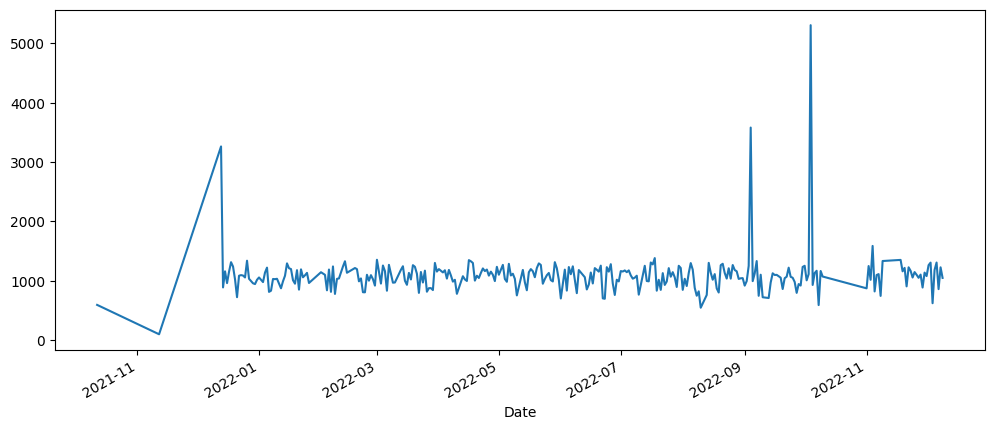

In [2]:
df['Amount'].plot(figsize=(12,5))

Step 2: Is the data set stationary?

In [3]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

     if dftest[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
     else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adf_test(df['Amount'])

1. ADF :  -11.474515710477181
2. P-Value :  5.169990479115276e-21
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression: 303
5. Critical Values :
	 1% :  -3.4521175397304784
	 5% :  -2.8711265007266666
	 10% :  -2.571877823851692
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


Step 3: Determine ARIMA Model

In [6]:
!pip install pmdarima
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Amount'], trace=True, suppress_warnings=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=4419.008, Time=1.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4448.969, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4418.725, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4414.093, Time=0.98 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5165.018, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4417.422, Time=0.38 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=4416.149, Time=0.54 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4418.133, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4883.594, Time=0.47 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 4.196 seconds


Step 4: Splitting the data set into training & testing sets
A common practice is to use around 70-80% of the data for training and the remaining 20-30% for testing

In [16]:
print(df.shape)
test=df.iloc[:-60]
train=df.iloc[-60:]
print(train.shape,test.shape)

(305, 2)
(60, 2) (245, 2)


Step 5: The ARIMA Model

In [17]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Amount'],order=(0,0,1))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Amount   No. Observations:                   60
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -431.877
Date:                Wed, 14 Jun 2023   AIC                            869.755
Time:                        06:58:56   BIC                            876.038
Sample:                             0   HQIC                           872.213
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1095.7629     40.033     27.372      0.000    1017.300    1174.226
ma.L1         -0.4678      0.193     -2.420      0.016      -0.847      -0.089
sigma2      1.042e+05   1.02e+04     10.218      0.000    8.42e+04    1.24e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):              1897.14
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):              10.33   Skew:                             4.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Step 5: Prediction on Test Set

In [18]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.index=df.index[start:end+1]
print(pred)

Date
2022-08-26    1335.828093
2022-08-25    1095.762877
2022-08-24    1095.762877
2022-08-23    1095.762877
2022-08-22    1095.762877
                 ...     
2021-12-15    1095.762877
2021-12-14    1095.762877
2021-12-13    1095.762877
2021-11-12    1095.762877
2021-10-12    1095.762877
Name: ARIMA Predictions, Length: 245, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

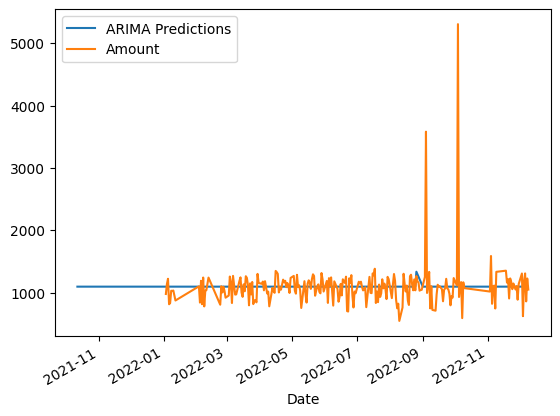

In [19]:
pred.plot(legend=True)
test['Amount'].plot(legend=True)

Check Model Accuracy

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Amount']))
print(rmse)

355.1405105118349


In [21]:
test['Amount'].mean()

1091.8040338383673

Predicting the future

In [22]:
model2=ARIMA(df['Amount'],order=(0,0,1))
model2=model2.fit()
df.tail()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

,Bin,Amount
Date,,
2021-12-15,mil-bin01,1159.125000
2021-12-14,mil-bin01,888.285714
2021-12-13,mil-bin01,3263.428571
2021-11-12,mil-bin01,99.000000
2021-10-12,mil-bin01,594.000000


In [23]:
index_future_dates=pd.date_range(start='2022-02-19',end='2022-03-21')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2022-02-19    1142.742751
2022-02-20    1091.434790
2022-02-21    1091.434790
2022-02-22    1091.434790
2022-02-23    1091.434790
2022-02-24    1091.434790
2022-02-25    1091.434790
2022-02-26    1091.434790
2022-02-27    1091.434790
2022-02-28    1091.434790
2022-03-01    1091.434790
2022-03-02    1091.434790
2022-03-03    1091.434790
2022-03-04    1091.434790
2022-03-05    1091.434790
2022-03-06    1091.434790
2022-03-07    1091.434790
2022-03-08    1091.434790
2022-03-09    1091.434790
2022-03-10    1091.434790
2022-03-11    1091.434790
2022-03-12    1091.434790
2022-03-13    1091.434790
2022-03-14    1091.434790
2022-03-15    1091.434790
2022-03-16    1091.434790
2022-03-17    1091.434790
2022-03-18    1091.434790
2022-03-19    1091.434790
2022-03-20    1091.434790
2022-03-21    1091.434790
Freq: D, Name: ARIMA Predictions, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: >

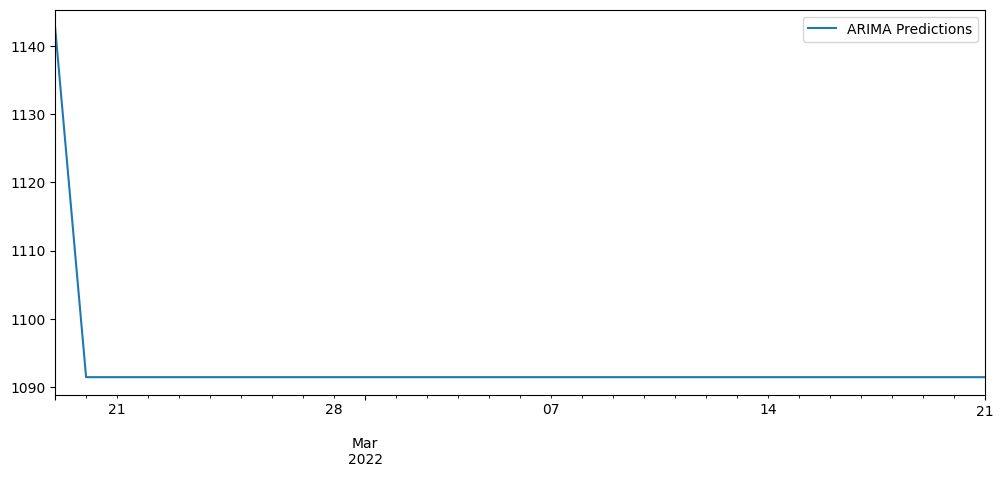

In [24]:
pred.plot(figsize=(12,5),legend=True)